### Linear Regression average temperature Us 1985-2024

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns

### Data from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series

In [ ]:
us_temperature = pd.read_csv('data.csv', sep=',')
us_temperature.head(5)

In [98]:
us_temperature.columns = ['Date', 'Temperature', 'Anomaly']
us_temperature.head(5)

,Date,Temperature,Anomaly
0,189501,26.69,-3.43
1,189601,31.48,1.36
2,189701,28.17,-1.95
3,189801,30.67,0.55
4,189901,29.68,-0.44


In [99]:
us_temperature.Date.dtype

dtype('int64')

#### Clean Date

In [100]:
us_temperature.Date = us_temperature.Date.floordiv(100)
us_temperature

,Date,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95
3,1898,30.67,0.55
4,1899,29.68,-0.44
...,...,...,...
125,2020,35.53,5.41
126,2021,34.59,4.47
127,2022,31.17,1.05
128,2023,35.13,5.01


In [101]:
pd.set_option('display.precision', 2)
us_temperature.Temperature.describe()

count    130.00
mean      30.60
std        3.07
min       21.92
25%       29.26
50%       30.89
75%       32.44
max       38.93
Name: Temperature, dtype: float64

In [102]:
linear_regression = stats.linregress(x=us_temperature.Date,
y=us_temperature.Temperature)
linear_regression.slope

0.021612312062161167

In [103]:
linear_regression.intercept

-11.749633178112493

#### a bit of prediction...

In [104]:
linear_regression.slope * 2030 + linear_regression.intercept

32.12336030807468

#### ... and backward prediction

In [105]:
linear_regression.slope * 1885 + linear_regression.intercept

28.989575059061305

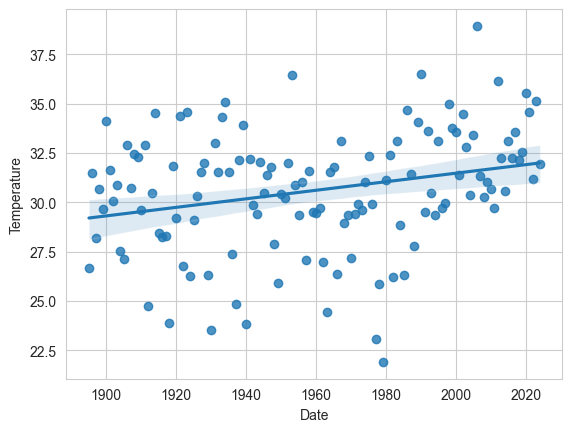

In [107]:
sns.set_style('whitegrid')
plot = sns.regplot(x=us_temperature.Date, y=us_temperature.Temperature)